In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
import tensorflow as tf
import numpy as np
from numpy  import expand_dims
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
np.random.seed(15)

Using TensorFlow backend.


# 1. Data Augmentation


dataset 이 너무 적은 경우 overfitting 문제가 발생함

![data augmetation](keras_data_augmentation_jitter.png)


keras에서는 dta augmentation을 통해 해결


- Translations
- Rotations
- Changes in scale
- Shearing
- Horizontal (and in some cases, vertical) flips

![image data augmetation](keras_data_augmentation_random_adjustments.jpg)


Type #1: existing dataset을 사용해 학습 dataset를 재구성함
  
<img src=keras_data_augmentation_dataset_generation.png width=300>
  
  

Type #2: In-place/on-the-fly data augmentation - keras에서 구현
   batch 수 만큼 ImageDataGenerator로 실시간 생성 후 원본 제외하고 생성된 데이터 셋으로 학습

<img src=keras_data_augmentation_in_place.png width=300>

잘못된 방식
<img src=keras_data_augmentation_incorrect.png  width=300>

In [2]:
img = tf.keras.preprocessing.image.load_img('cat.jpg')  # 이미지 객체임
data = tf.keras.preprocessing.image.img_to_array(img)   # data 만 추출
sample = expand_dims(data,0)  
print(sample.shape)

(1, 183, 275, 3)


In [3]:
# opencv 사용해 이미지 loaidng
data = cv2.imread('cat.jpg')
data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
sample = expand_dims(data,0)
print(sample.shape)

(1, 183, 275, 3)


수평, 수직 이동

In [25]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(    
    width_shift_range = 0.2) 
obj = generator.flow(sample, batch_size=1)   

(1, 183, 275, 3)
(183, 275, 3)


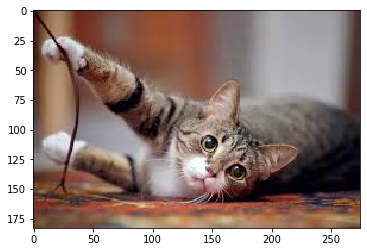

In [26]:
# 할때마다 다른 이미지 나온다.
image = obj.next()
print(image.shape)  # 
print(image[0].shape)
#plt.imshow(image[0].astype('uint8') )  #  plt로 할때는 0~1사이로  혹은 타입을 uint8로 
plt.imshow(image[0]/255)  #  plt로 할때는 0~1사이로  혹은 타입을 uint8로 

In [6]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(    
    width_shift_range = 0.2, rescale=1./255)   # rescale 해주면 정규화하고, imshow할때 type변한 필유없다.
obj = generator.flow(sample, batch_size=1)   

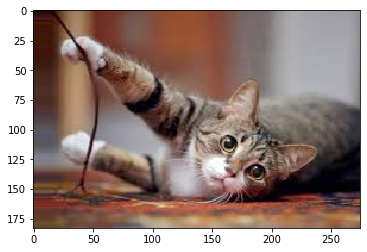

In [7]:
image = obj.next()
plt.imshow(image[0] )

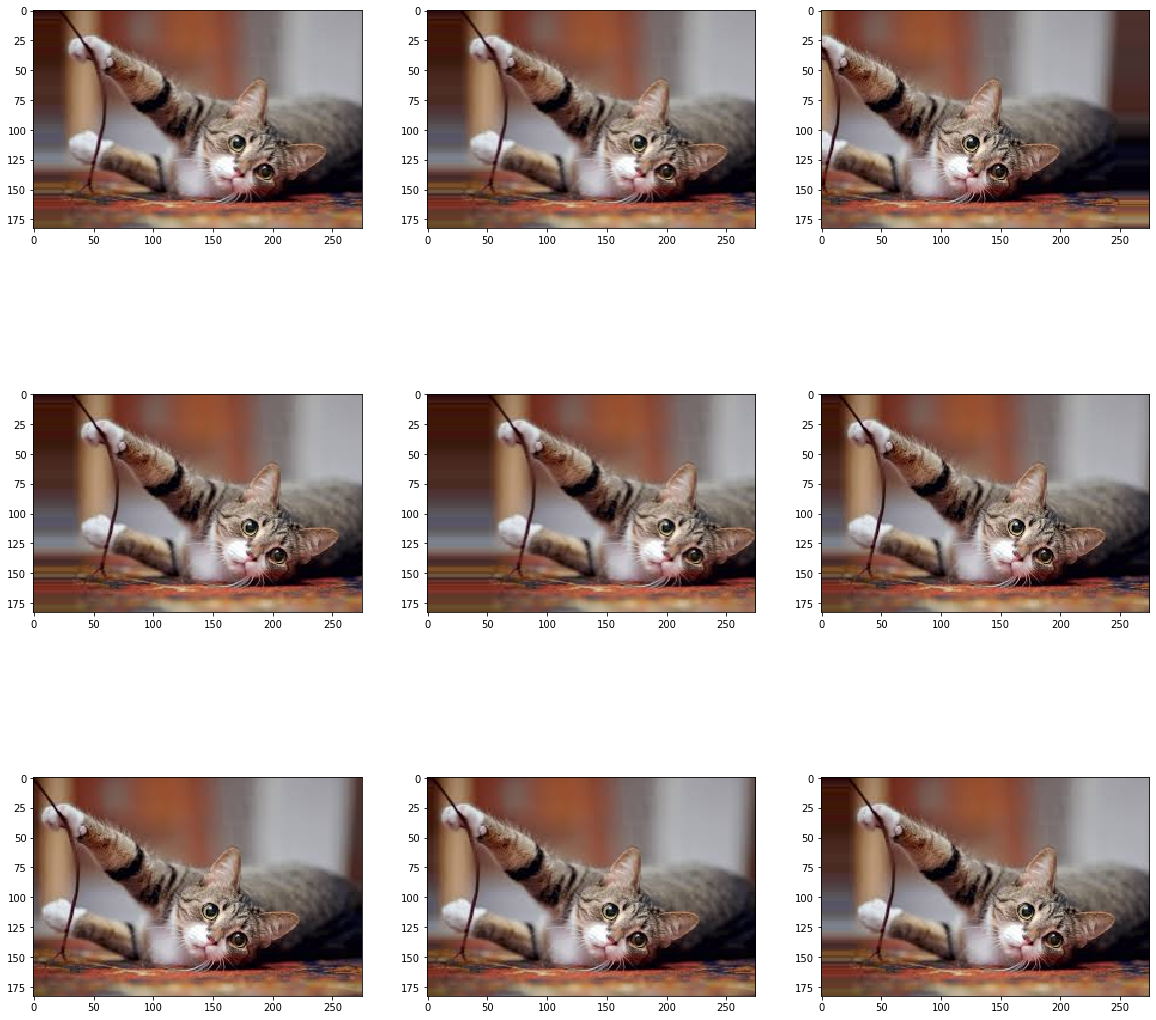

In [8]:
fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

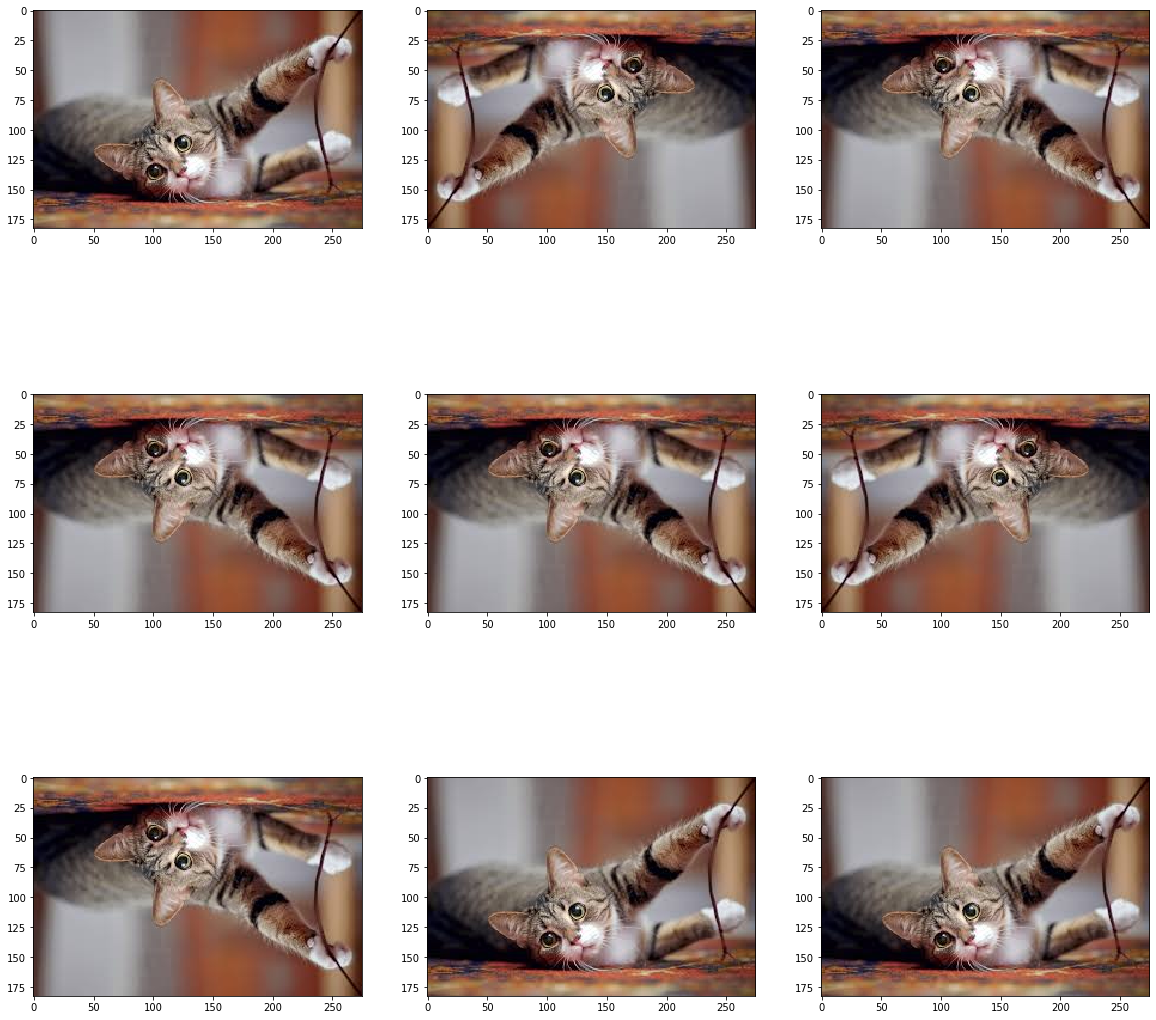

In [9]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    horizontal_flip = True, vertical_flip = True,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

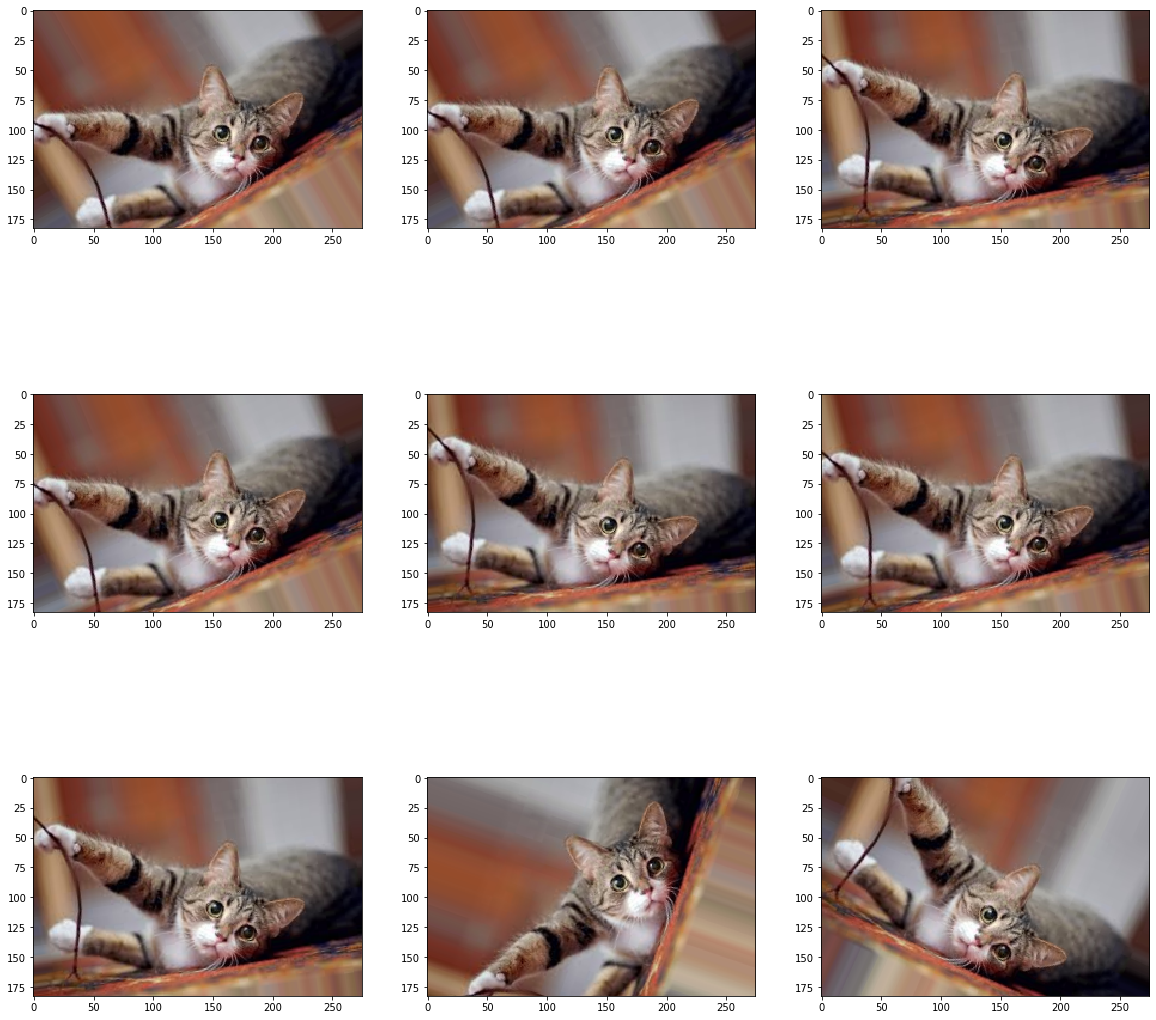

In [10]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    rotation_range=90,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   
    

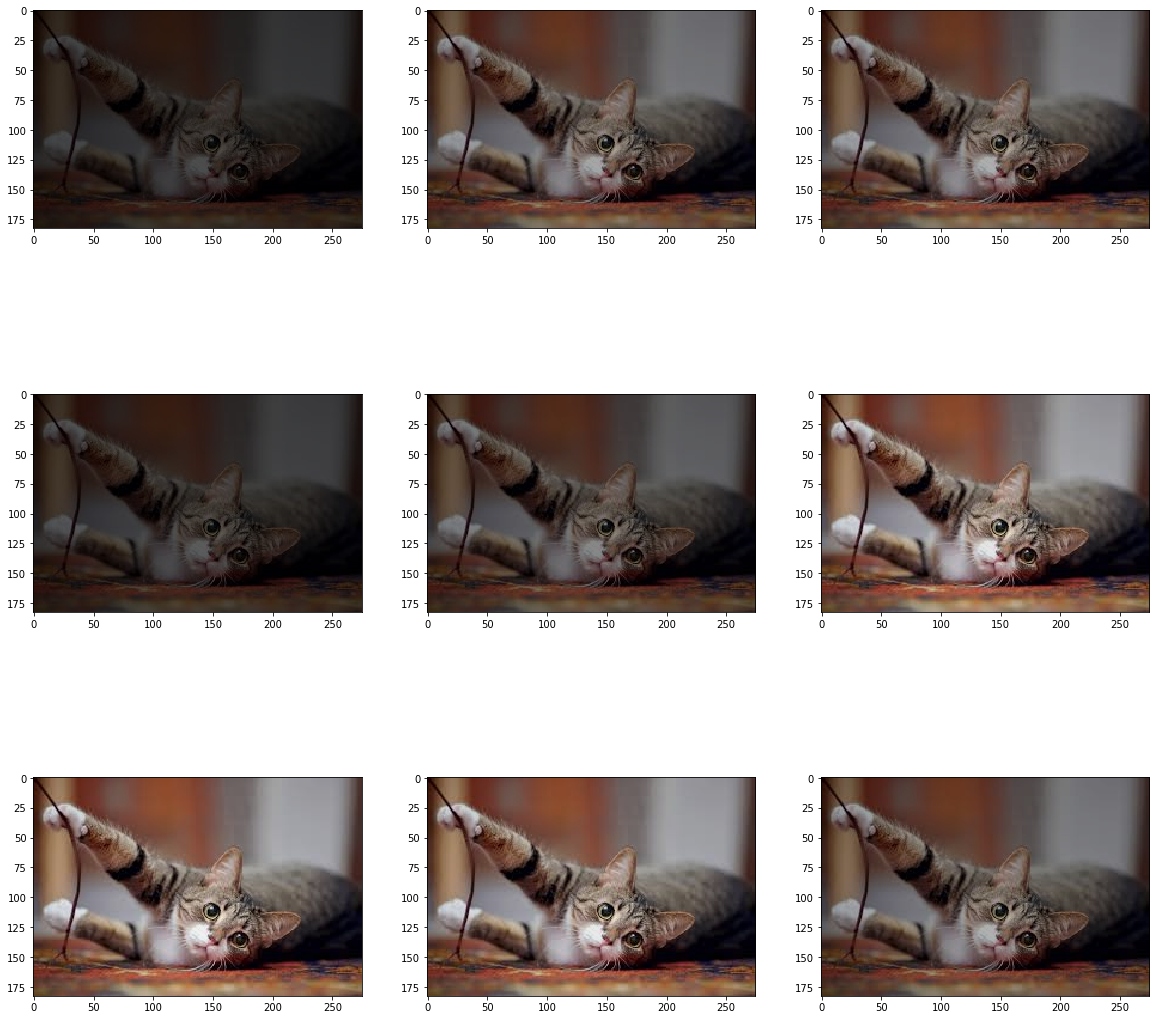

In [11]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    brightness_range=[0.2, 1.0],       
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

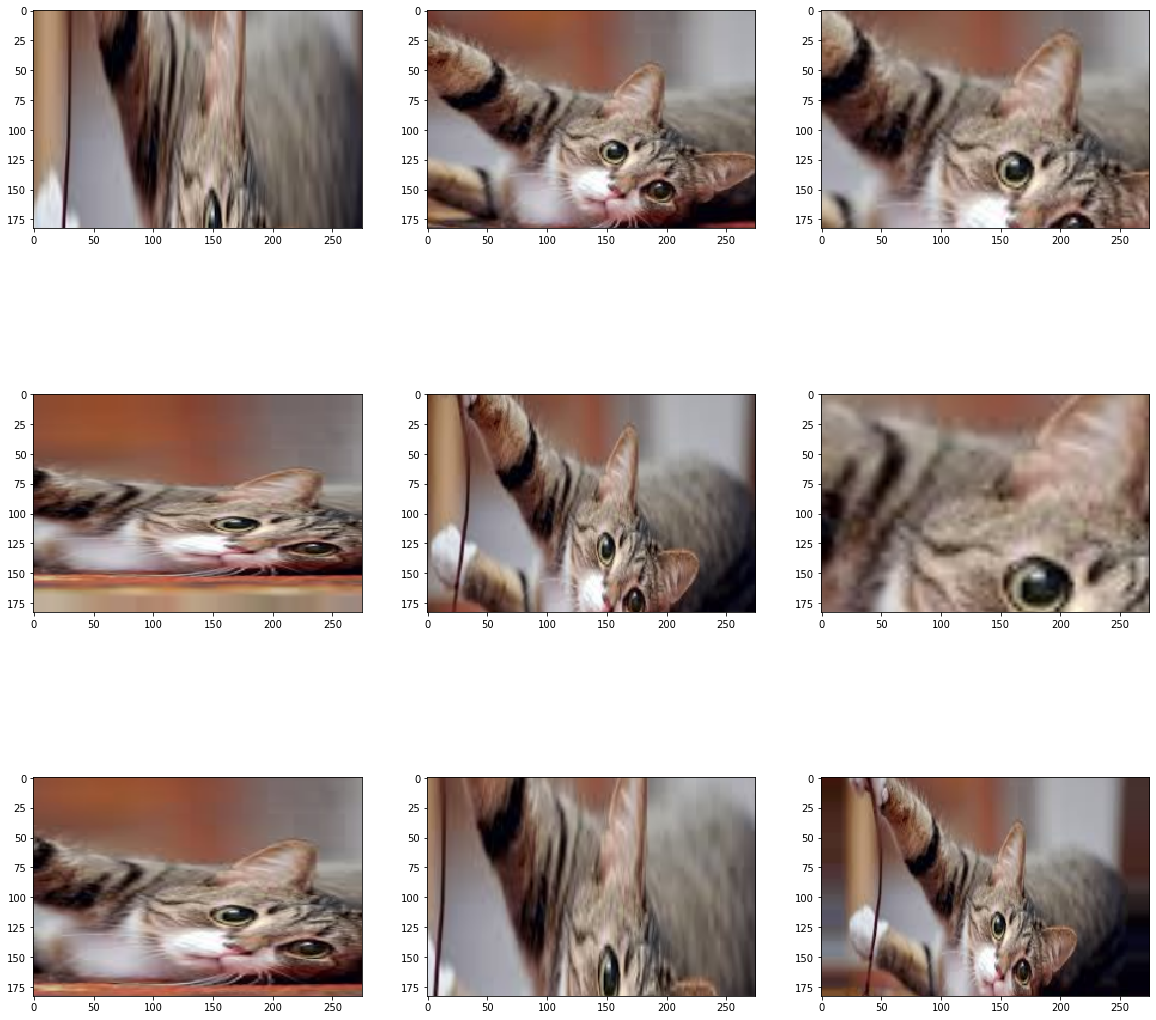

In [27]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    zoom_range=[0.2, 1.2],   
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

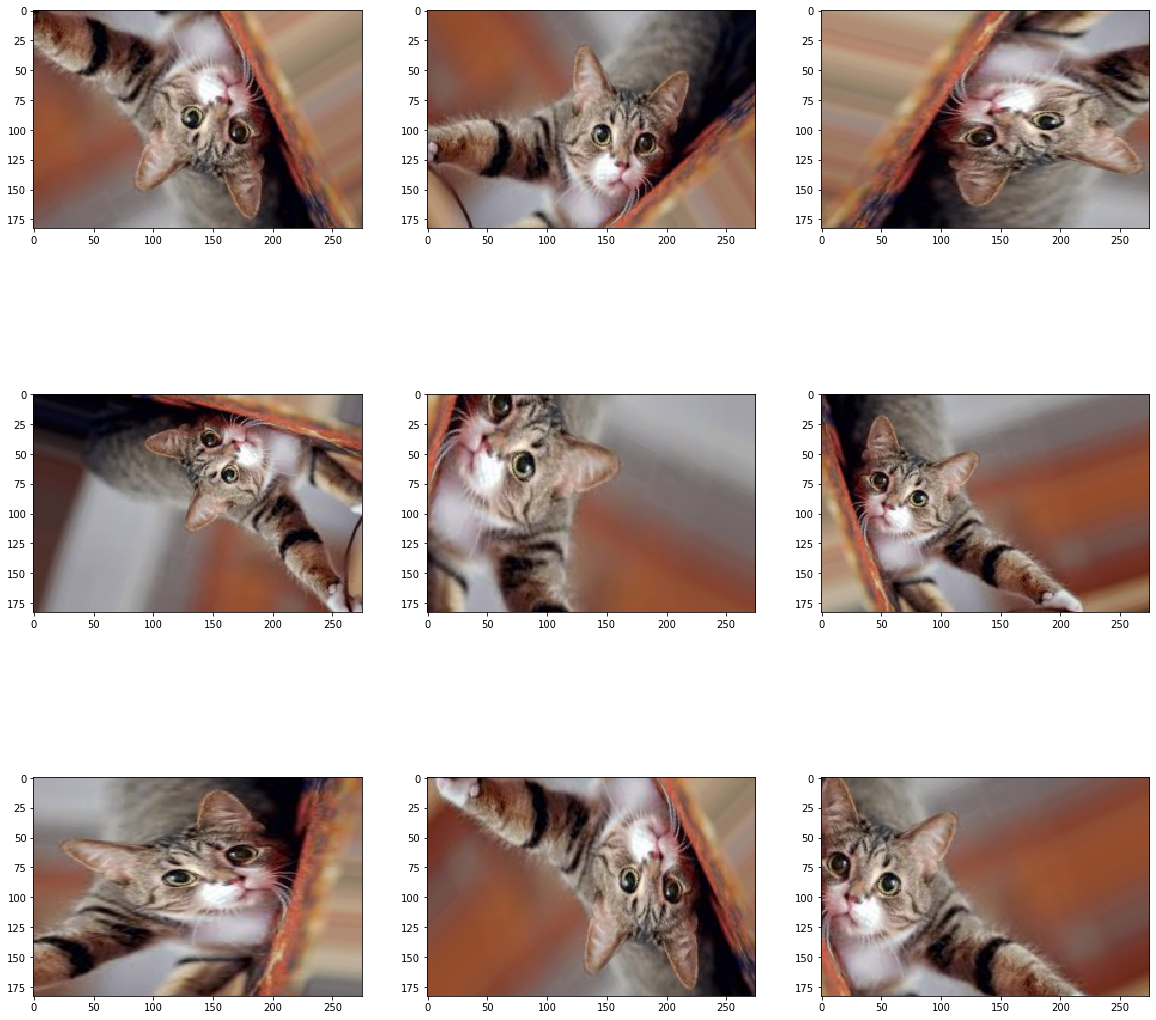

In [13]:
# 한꺼번에 적용하기
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    width_shift_range = 0.2,
    zoom_range=[0.5, 1.0],   
    horizontal_flip = True, vertical_flip = True,
    rotation_range=90,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

In [29]:
# 파일로 저장하기
obj = generator.flow(sample, batch_size=1, save_to_dir='data/tmp/cat',  # 폴더는 생성되어 있어야 함
    save_prefix="image", save_format="jpg")    

for i in range(0, 5):
    obj.next()    

In [32]:
# 2.  디렉토리로 부터 augmentation
#augsample/c1/2개 이미지
#augsample/c2/6개 이미지    
#augsample/c3/1개 이미지    

obj = generator.flow_from_directory(
    'data/train',
    target_size = (150, 150),   # 읽어드릴 이미지, 이미지 크기를 맞춰야 하기 때문에 생략시 256x256
    batch_size = 4,   # 8개 이미지 중에서 한번에 생성할 이미지 수 
    class_mode = 'binary' )  # # binary(label)  |  categorical(one-hot)

iterations = 2

for i, (img, label) in enumerate(obj):
    n_img = len(label)    # 폴더에 있는 이미지 갯수 만큼 리턴한다.
    print(label)
    print(img.shape)
    if i is iterations - 1:
        break      
# 결과를 보면 lable은 1,1,1,0 처럼 꼭 c1과 c2에서 규일하게 생성되는것은 아니다.

Found 45 images belonging to 3 classes.
[0. 2. 0. 1.]
(4, 150, 150, 3)
[1. 2. 0. 1.]
(4, 150, 150, 3)


In [33]:
# 저장하기
obj = generator.flow_from_directory(
    'data/train',
    target_size = (150, 150),   # 읽어드릴 이미지, 이미지 크기를 맞춰야 하기 때문에 생략시 256x256
    batch_size = 4,   # 8개 이미지 중에서 최대4개 만들어냄
    class_mode = 'binary',
    save_prefix="image", save_format="jpg",save_to_dir='tmp')

iterations = 2

for i, (img, label) in enumerate(obj):
    n_img = len(label)    # 폴더에 있는 이미지 갯수 만큼 리턴한다.
    print(label)
    print(img.shape)
    if i is iterations - 1:
        break
# aug 폴더하나에 8개이미지 출력됙다.  class별로 저정할수 없나?( 좀더 찾아바야함)

Found 45 images belonging to 3 classes.
[0. 2. 0. 1.]
(4, 150, 150, 3)
[2. 1. 0. 2.]
(4, 150, 150, 3)


#  2. 도형 

In [34]:
np.random.seed(5)


# # 데이터셋 불러오기
# data_aug_gen = ImageDataGenerator(rescale=1./255, 
#                                   rotation_range=15,
#                                   width_shift_range=0.1,
#                                   height_shift_range=0.1,
#                                   shear_range=0.5,
#                                   zoom_range=[0.8, 2.0],
#                                   horizontal_flip=True,
#                                   vertical_flip=True,
#                                   fill_mode='nearest')
                                   
# img = load_img('data/train/triangle/triangle001.png')
# x = img_to_array(img)
# x = x.reshape((1,) + x.shape)
# i = 0

# # 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
# for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='hard_handwriting_shape/tmp', save_prefix='tri', save_format='png'):
#     i += 1
#     if i > 30: 
#         break
        
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical', shuffle=False)

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [35]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# 모델 학습시키기
model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=10, #200
        validation_data=test_generator,
        validation_steps=5)

Epoch 1/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0210 - accuracy: 0.9940 - val_loss: 0.0363 - val_accuracy: 0.8000
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0155 - accuracy: 0.9953 - val_loss: 0.0000e+00 - val_accuracy: 0.8000
Epoch 3/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0220 - accuracy: 0.9942 - val_loss: 0.0000e+00 - val_accuracy: 0.7333
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0158 - accuracy: 0.9964 - val_loss: 5.1657e-06 - val_accuracy: 0.8667
Epoch 5/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0171 - accuracy: 0.9956 - val_loss: 7.3114e-06 - val_accuracy: 0.8667
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 1.7563e-05 - val_accuracy: 0.8000
Epoch 7/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0042 - accuracy: 0.9984 

In [ ]:
# 모델 예측하기
print("-- Predict --")
output = model.predict_generator( test_generator,  steps = 5)    # batch 사이즈가 3 , 15개가 생성됨
print(output)

T = test_generator.classes
print(T)
p = np.argmax(output, axis=1)
print(p)

sum((T == p)*1) / len(T)

In [ ]:
# 모델 평가하기
scores = model.evaluate_generator( test_generator, steps = 5)
print(scores[1])

# 3. dog cat  augmentatation

- https://keraskorea.github.io/posts/2018-10-24-little_data_powerful_model/
- https://www.kaggle.com/c/dogs-vs-cats/data
- 학습 데이터로 1,000장의 고양이 사진과 1,000장의 강아지 사진을 사용 (kaggle  25,000자)
- 검증 데이터로는 각각 400장 사용

In [ ]:
img = load_img('cat.jpg') 
x = img_to_array(img)
print(x.shape)   # w,h,c 인직 확인

In [ ]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# 검증 및 테스트 이미지는 augmentation을 적용하지 않음(이미지 원본을 사용)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 이미지를 배치 단위로 불러와 줄 generator입니다.
train_generator = train_datagen.flow_from_directory(
        'smallcatdog/train', 
        target_size=(150, 150), 
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = validation_datagen.flow_from_directory(
        'smallcatdog/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        'smallcatdog/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# steps_per_epoch는 한 세대마다 몇 번 생성기로부터 데이터를 얻을지를 나타내는 값
# 한 세대마다 사용되는 학습데이터의 수는 steps_per_epoch * batch_size
        
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,    # 2000/16     한번에 125개씩 생성
        epochs=5,  #50
        validation_data=validation_generator,
        validation_steps=800 // batch_size)     # 800/16   한번에 50개씩 생성

In [ ]:
# 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate_generator( test_generator,       steps = 5)
print(scores[1])

In [ ]:
# augmentation 없이  학습
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1./255 )
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 이미지를 배치 단위로 불러와 줄 generator입니다.
train_generator = train_datagen.flow_from_directory(
        'smallcatdog/train',  # this is the target directory
        target_size=(150, 150),  # 모든 이미지의 크기가 150x150로 조정됩니다.
        batch_size=batch_size,
        class_mode='binary')  # binary_crossentropy 손실 함수를 사용하므로 binary 형태로 라벨을 불러와야 합니다.

validation_generator = validation_datagen.flow_from_directory(
        'smallcatdog/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        'smallcatdog/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=5, # 50
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

model.save("smallcatdog.h5")
scores = model.evaluate_generator( test_generator,       steps = 5)
print(scores[1])

# 4. imagenet에서 검색해서 다운하기



In [ ]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

In [ ]:
page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289") #ship synset  wnetid
soup = BeautifulSoup(page.content, 'html.parser')
str_soup=str(soup)
split_urls=str_soup.split('\r\n')
print(len(split_urls))

In [ ]:
bikes_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02834778")#bicycle synset
bikes_soup = BeautifulSoup(bikes_page.content, 'html.parser')
bikes_str_soup=str(bikes_soup)
bikes_split_urls=bikes_str_soup.split('\r\n')
print(len(bikes_split_urls))

In [ ]:
def url_downalod(urls, path, prefix) :    
    idx = 0
    for url in urls :
        try:
            resp = urllib.request.urlopen(url)
            image = np.asarray(bytearray(resp.read()), dtype="uint8")
            image = cv2.imdecode(image, cv2.IMREAD_COLOR)
            if ( len(image.shape)) == 3 :
                print(url)
                idx += 1
                save_path = path + '/' + prefix + str(idx)+'.jpg'
                cv2.imwrite(save_path,image)
        except :
            None


In [ ]:
url_downalod(split_urls, 'imagenet/aa', 'ship') # aa 폴더에 ship1 부터 저장

In [ ]:
url_downalod(bikes_split_urls, 'imagenet/bikes', 'bike')

In [ ]:
train_datagen  = ImageDataGenerator()
test_datagen = ImageDataGenerator()
    
train_generator = train_datagen.flow_from_directory(
        'imagenet/train/',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'imagenet/validation/',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

In [ ]:
model2 =  Sequential()
model2.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3))) 
model2.add(Conv2D(8, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model2.fit_generator(
        train_generator,
        steps_per_epoch=100, # 2000
        epochs=2, validation_data=validation_generator   #65
        )

In [ ]:
img_path = 'imagenet/ship.jpg'
img = load_img(img_path, target_size=(32, 32))
x = img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
preds = model2.predict(x)

print(preds)
print('Probability that the image is a Bicycle:', preds[0,0])
print('Probability that the image is a Ship:', preds[0,1])

# 5. 네트웍 저장 및 복구

In [ ]:
model2.save('bicycleship.h5')

In [ ]:
from keras.models import load_model
model2 = load_model('bicycleship.h5')


img_path = 'imagenet/ship.jpg'
img = load_img(img_path, target_size=(32, 32))
x = img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
preds = model2.predict(x)

print(preds)
print('Probability that the image is a Bicycle:', preds[0,0])
print('Probability that the image is a Ship:', preds[0,1])

In [ ]:
model_json = model2.to_json()
with open("bicycleship.json", "w") as json_file : 
    json_file.write(model_json)   
model2.save_weights("bicycleship_w.h5")

In [ ]:
from keras.models import model_from_json 

json_file = open("bicycleship.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 
model3 = model_from_json(loaded_model_json)
model3.load_weights("bicycleship_w.h5")

img_path = 'imagenet/ship.jpg'
img = load_img(img_path, target_size=(32, 32))
x = img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
preds = model3.predict(x)

print(preds)
print('Probability that the image is a Bicycle:', preds[0,0])
print('Probability that the image is a Ship:', preds[0,1])